In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 1.3/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.8/150.0 MB 2.5 MB/s eta 0:01:01
    --------------------------------------- 2.4/150.0 MB 2.5 MB/s eta 0:00:59
    --------------------------------------- 2.6/150.0 MB 2.7 MB/s eta 0:00:55
    --------------------------------------- 3.4/150.0 MB 2.5 MB/s eta 0:00:59
    --------------------------------------- 3.7/150.0 MB 2.4 MB/s eta 0:01:01
   - -------------------------------------- 4.2/150.0 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 4.7/150.0 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 4.7/150.0 MB 2.4 MB/s eta 0:01:00
   - -------------------------------------- 5.0/150.0 MB 2.2 MB/s eta 0:01:06


In [15]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tabulate import tabulate

# Scikit-learn components
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)

# TensorFlow/Keras components
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, 
    MaxPooling1D, 
    Flatten, 
    Dense, 
    Dropout
)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical, plot_model

# XGBoost and other ML libraries
from xgboost import XGBClassifier
import joblib

# Image processing
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Feature selection
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report

# Label Encoding
label_encoder = LabelEncoder()

# Assuming data_train and data_test are preloaded and processed
# Fit LabelEncoder on training data and transform both training and test labels
data_train['label'] = label_encoder.fit_transform(data_train['label'])
data_test['label'] = label_encoder.transform(data_test['label'])  # Use the same encoder for test set

# Split features and target variables for training and testing
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']

# Feature Scaling (Optional but recommended for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the model (XGBoost in this case)
model = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Convert label_encoder.classes_ to a list of class names (strings) for the classification report
class_names = [str(i) for i in label_encoder.classes_]

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       1.00      0.99      1.00       103
          BenignTraffic       0.93      0.99      0.96     32541
       BrowserHijacking       0.99      0.95      0.97       172
       CommandInjection       1.00      1.00      1.00       164
 DDoS-ACK_Fragmentation       1.00      1.00      1.00      8369
        DDoS-HTTP_Flood       1.00      1.00      1.00       865
        DDoS-ICMP_Flood       1.00      1.00      1.00    211685
DDoS-ICMP_Fragmentation       1.00      1.00      1.00     13261
      DDoS-PSHACK_Flood       1.00      1.00      1.00    119841
       DDoS-RSTFINFlood       1.00      1.00      1.00    119511
         DDoS-SYN_Flood       1.00      1.00      1.00    120112
         DDoS-SlowLoris       1.00      1.00      1.00       681
DDoS-SynonymousIP_Flood       1.00      1.00      1.00    105991
         DDoS-TCP_Flood       1.00      1.00      1.00    132463
 

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of file paths to read
file_paths = [
    'C:/Users/Hp/CIC_IoT_Datasets/part-00034-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'C:/Users/Hp/CIC_IoT_Datasets/part-00035-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'C:/Users/Hp/CIC_IoT_Datasets/part-00036-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'C:/Users/Hp/CIC_IoT_Datasets/part-00037-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    'C:/Users/Hp/CIC_IoT_Datasets/part-00038-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
]

# Read CSV files into DataFrames
dfs = []
for file in file_paths:
    try:
        df = pd.read_csv(file)
        dfs.append(df)
    except FileNotFoundError:
        print(f"File not found: {file}")
    except pd.errors.ParserError:
        print(f"Error parsing file: {file}")

# Concatenate DataFrames
data_test = pd.concat(dfs, axis=0, ignore_index=True)

# Base path for other datasets
base_path = "C:/Users/Hp/CIC_IoT_Datasets/"

# Loop to load files dynamically
df = []
for i in range(34, 39):  # Processing files from part-00034 to part-00038
    if i < 10:
        filename = f"{base_path}part-0000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    else:
        filename = f"{base_path}part-000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    
    try:
        dfs = pd.read_csv(filename)
        df.append(dfs)
    except FileNotFoundError:
        print(f"File not found: {filename}")
    except pd.errors.ParserError:
        print(f"Error parsing file: {filename}")

# Concatenate the DataFrames into one DataFrame for the training set
if df:
    data_train = pd.concat(df, ignore_index=True)
else:
    print("No files loaded for training data.")

# Display first few rows of the training and testing datasets
print(f"Training Data Shape: {data_train.shape}")
print(f"Test Data Shape: {data_test.shape}")

# Optional: Display the first few rows to check if everything loaded correctly
print("First few rows of training data:")
print(data_train.head())

print("First few rows of testing data:")
print(data_test.head())


Training Data Shape: (1375807, 47)
Test Data Shape: (1375807, 47)
First few rows of training data:
   flow_duration  Header_Length  Protocol Type  Duration       Rate  \
0       2.563343       11914.52           6.00     63.84   7.673865   
1       0.000000          54.00           6.00     64.00   1.690761   
2       0.000000          54.00           6.00     64.00   6.445334   
3       1.992775         129.60           5.94     63.36   1.484730   
4      14.249416     1454763.00           6.00    147.50  97.653052   

       Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0   7.673865    0.0              0.0              0.0              0.0  ...   
1   1.690761    0.0              0.0              1.0              0.0  ...   
2   6.445334    0.0              0.0              1.0              0.0  ...   
3   1.484730    0.0              0.0              1.0              0.0  ...   
4  97.653052    0.0              0.0              0.0              0.0  ...   


In [15]:
print("Dataset train shape:", data_train.shape)
print("Dataset test shape:", data_test.shape)

print("Columns:", data_train.columns.tolist())

Dataset train shape: (1375807, 47)
Dataset test shape: (1375807, 47)
Columns: ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label']


In [17]:
data_train.isnull().sum()


flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [19]:
data_test.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [21]:
data_train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,2.563343,11914.52,6.00,63.84,7.673865,7.673865,0.0,0.0,0.0,0.0,...,647.341343,742.32,8.300267e+07,9.5,38.667118,916.096372,489316.179108,0.94,141.55,DoS-HTTP_Flood
1,0.000000,54.00,6.00,64.00,1.690761,1.690761,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308913e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
2,0.000000,54.00,6.00,64.00,6.445334,6.445334,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.297261e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
3,1.992775,129.60,5.94,63.36,1.484730,1.484730,0.0,0.0,1.0,0.0,...,0.068860,54.06,8.336245e+07,9.5,10.393931,0.097836,0.095814,0.05,141.55,DDoS-SynonymousIP_Flood
4,14.249416,1454763.00,6.00,147.50,97.653052,97.653052,0.0,0.0,0.0,0.0,...,333.830443,790.00,1.827788e-03,5.5,22.553290,472.107540,225240.335576,0.50,38.50,BenignTraffic


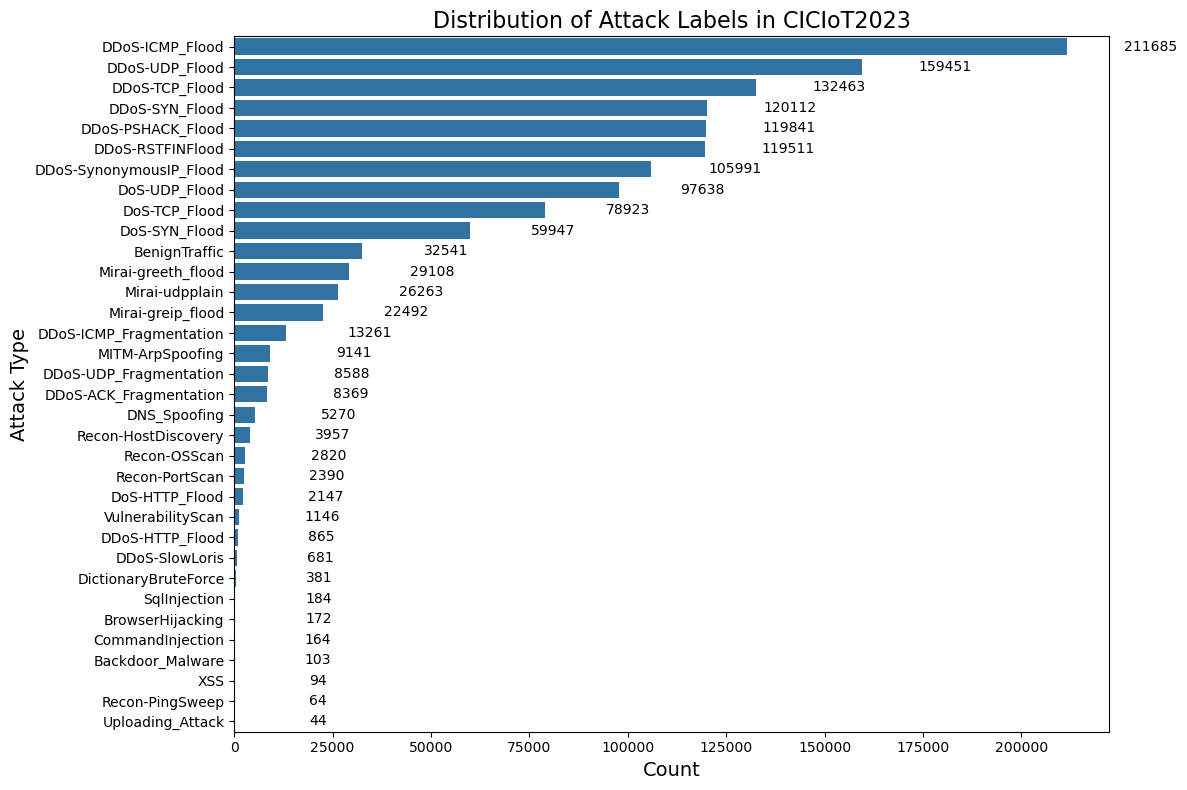

<Figure size 640x480 with 0 Axes>

In [23]:
target_col = 'label'
plt.figure(figsize=(12, 8))
ax = sns.countplot(data_train, y=target_col, order=data_train[target_col].value_counts().index)

# 3. Add annotations and styling
plt.title('Distribution of Attack Labels in CICIoT2023', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Attack Type', fontsize=14)

# Add count values on each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1 * max(data_train[target_col].value_counts()), 
             p.get_y() + p.get_height()/2., 
             f'{int(width)}', 
             ha='center', va='center')

plt.tight_layout()
plt.show()

# 4. Optional: Save the plot
plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')

In [25]:
def keep_max_subclass(df):
    # Define subclass to main class mapping
    subclass_mapping = {
        'DDoS': ['DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
                 'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood',
                 'DDoS-ICMP_Fragmentation', 'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation',
                 'DDoS-HTTP_Flood', 'DDoS-SlowLoris'],
        'DoS': ['DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood'],
        'Recon': ['Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan',
                 'Recon-PingSweep', 'VulnerabilityScan'],
        'Spoofing': ['MITM-ArpSpoofing', 'DNS_Spoofing'],
        'BruteForce': ['DictionaryBruteForce'],  # Only one subclass, so it will be kept
        'Web-based': ['BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection',
                     'CommandInjection', 'Backdoor_Malware'],
        'Mirai': ['Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood'],
        'BENIGN': ['BenignTraffic']  # No filtering needed
    }

    # Reverse mapping (subclass → main class)
    subclass_to_main = {}
    for main_class, subclasses in subclass_mapping.items():
        for subclass in subclasses:
            subclass_to_main[subclass] = main_class

    # Step 1: Find the most frequent subclass for each main class
    main_class_max_subclass = {}
    for main_class, subclasses in subclass_mapping.items():
        if main_class == 'BENIGN':
            continue  # No filtering for BENIGN
        
        # Get counts of each subclass in the dataset
        subclass_counts = df[df['label'].isin(subclasses)]['label'].value_counts()
        
        if not subclass_counts.empty:
            max_subclass = subclass_counts.idxmax()
            main_class_max_subclass[max_subclass] = main_class

    # Step 2: Filter the DataFrame to keep only:
    # - The most frequent subclass from each main class
    # - All BENIGN samples (since they have no subclasses)
    mask = df['label'].isin(main_class_max_subclass.keys()) | \
           (df['label'] == 'BenignTraffic')
    
    filtered_df = df[mask].copy()

    # Step 3: Replace the kept subclasses with their main class labels
    for subclass, main_class in main_class_max_subclass.items():
        filtered_df.loc[filtered_df['label'] == subclass, 'label'] = main_class

    return filtered_df

# Apply to train and test data
data_train = keep_max_subclass(data_train)
data_test = keep_max_subclass(data_test)

In [27]:
data_train.label.value_counts()

label
DDoS             211685
DoS               97638
BenignTraffic     32541
Mirai             29108
Spoofing           9141
Recon              3957
BruteForce          381
Web-based           184
Name: count, dtype: int64

In [29]:
data_train.shape

(384635, 47)

In [31]:
data_test.shape

(384635, 47)

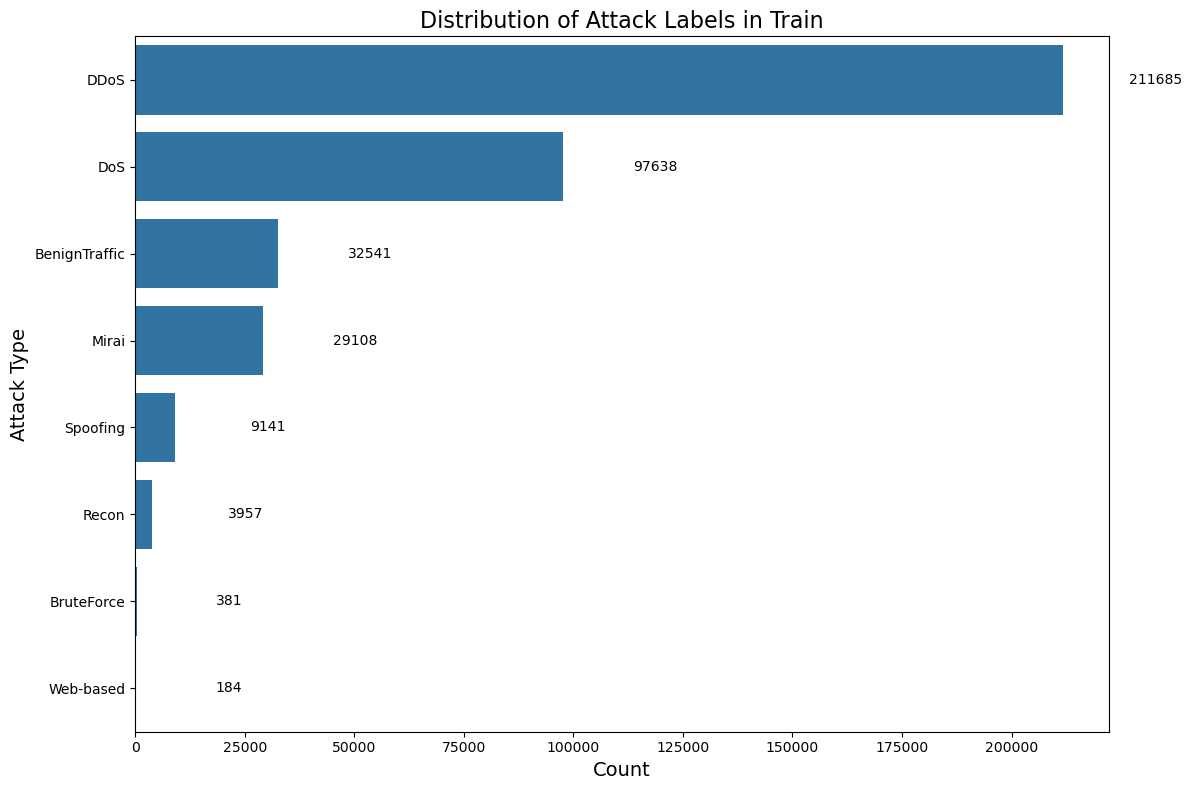

In [33]:
target_col = 'label'
plt.figure(figsize=(12, 8))
ax = sns.countplot(data_train, y=target_col, order=data_train[target_col].value_counts().index)

# 3. Add annotations and styling
plt.title('Distribution of Attack Labels in Train', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Attack Type', fontsize=14)

# Add count values on each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1 * max(data_train[target_col].value_counts()), 
             p.get_y() + p.get_height()/2., 
             f'{int(width)}', 
             ha='center', va='center')

plt.tight_layout()
plt.show()

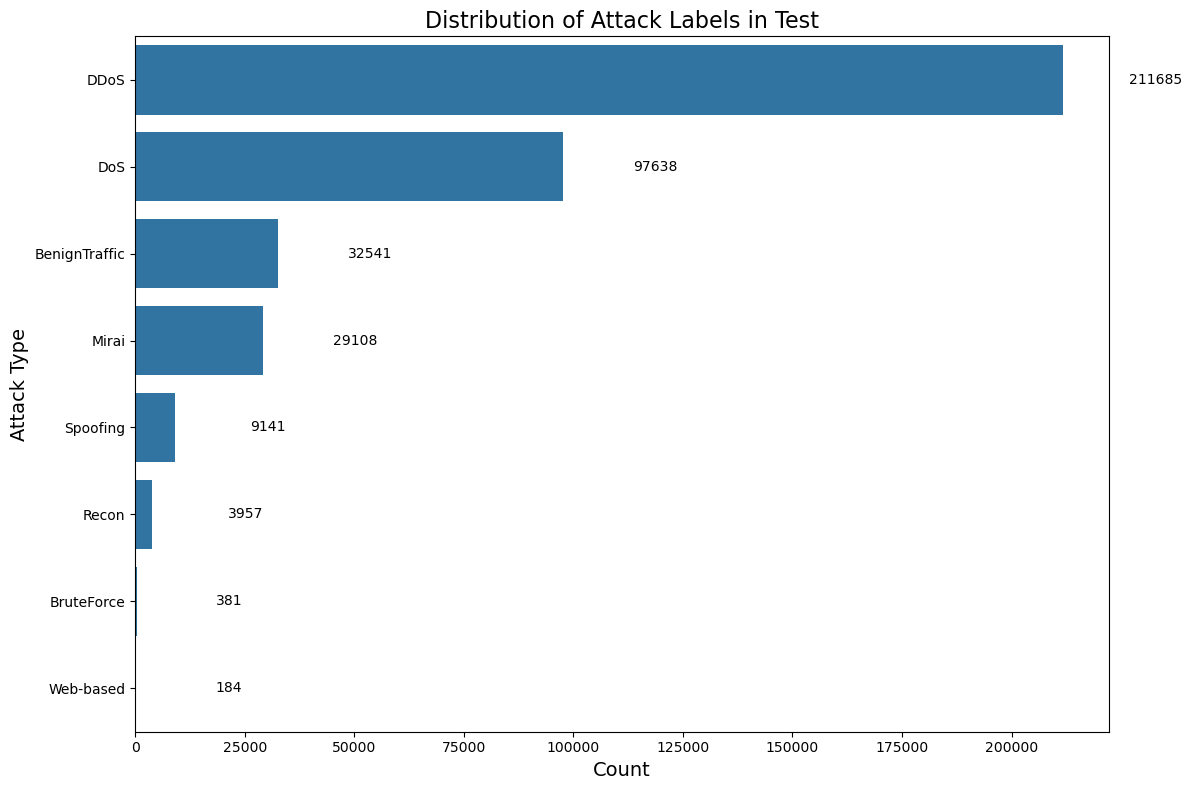

In [35]:
target_col = 'label'
plt.figure(figsize=(12, 8))
ax = sns.countplot(data_test, y=target_col, order=data_test[target_col].value_counts().index)

# 3. Add annotations and styling
plt.title('Distribution of Attack Labels in Test', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Attack Type', fontsize=14)

# Add count values on each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1 * max(data_test[target_col].value_counts()), 
             p.get_y() + p.get_height()/2., 
             f'{int(width)}', 
             ha='center', va='center')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply encoding to both train and test sets
data_train['label'] = label_encoder.fit_transform(data_train['label'])
data_test['label'] = label_encoder.transform(data_test['label'])  # Use same encoder

# Verify the mapping
print("Label Classes Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

# Check encoded labels
print("\nEncoded labels in training set:", data_train['label'].unique())

Label Classes Mapping:
BenignTraffic: 0
BruteForce: 1
DDoS: 2
DoS: 3
Mirai: 4
Recon: 5
Spoofing: 6
Web-based: 7

Encoded labels in training set: [0 3 2 6 4 5 1 7]


In [39]:
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[0]	train-mlogloss:1.70229	test-mlogloss:1.70229
[10]	train-mlogloss:0.50272	test-mlogloss:0.50272
[20]	train-mlogloss:0.19263	test-mlogloss:0.19263
[30]	train-mlogloss:0.08380	test-mlogloss:0.08380
[40]	train-mlogloss:0.04313	test-mlogloss:0.04313
[50]	train-mlogloss:0.02732	test-mlogloss:0.02732
[60]	train-mlogloss:0.02086	test-mlogloss:0.02086
[70]	train-mlogloss:0.01785	test-mlogloss:0.01785
[80]	train-mlogloss:0.01621	test-mlogloss:0.01621
[90]	train-mlogloss:0.01512	test-mlogloss:0.01512
[100]	train-mlogloss:0.01416	test-mlogloss:0.01416
[110]	train-mlogloss:0.01335	test-mlogloss:0.01335
[120]	train-mlogloss:0.01259	test-mlogloss:0.01259
[130]	train-mlogloss:0.01193	test-mlogloss:0.01193
[140]	train-mlogloss:0.01129	test-mlogloss:0.01129
[150]	train-mlogloss:0.01073	test-mlogloss:0.01073
[160]	train-mlogloss:0.01023	test-mlogloss:0.01023
[170]	train-mlogloss:0.00978	test-mlogloss:0.00978
[180]	train-mlogloss:0.00934	test-mlogloss:0.00934
[190]	train-mlogloss:0.00895	test-mlogloss

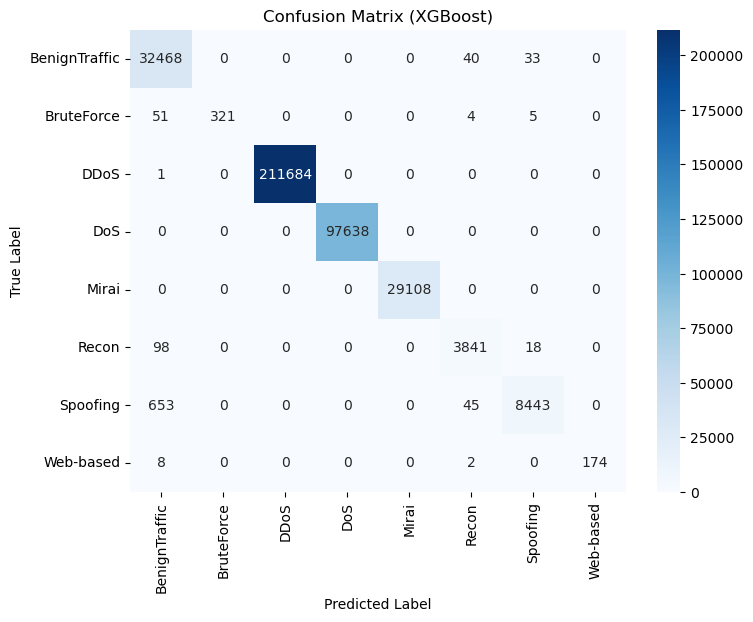


Accuracy: 0.9975
F1-Score (weighted): 0.9975


In [43]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
params = {
    'objective': 'multi:softmax',          # Multi-class classification
    'num_class': len(label_encoder.classes_),  # Number of classes
    'eval_metric': 'mlogloss',            # Multiclass logloss
    'eta': 0.1,                           # Learning rate
    'max_depth': 6,                       # Tree depth
    'subsample': 0.8,                     # Random sample ratio per tree
    'colsample_bytree': 0.8,              # Feature sample ratio per tree
    'seed': 42,                           # Reproducibility
    'gamma': 0.1,                         # Minimum loss reduction for splitting
    'min_child_weight': 1                 # Minimum sum of instance weight
}

# 3. Convert to DMatrix (optimized format)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# 4. Training with Early Stopping
evals = [(dtrain, 'train'), (dtest, 'test')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=10
)

# 5. Evaluation
y_pred = model.predict(dtest).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")

Top 15 Features (based on Information Gain): ['feature_1', 'feature_3', 'feature_6', 'feature_9', 'feature_12', 'feature_13', 'feature_15', 'feature_18', 'feature_19', 'feature_20', 'feature_22', 'feature_23', 'feature_24', 'feature_28', 'feature_29']


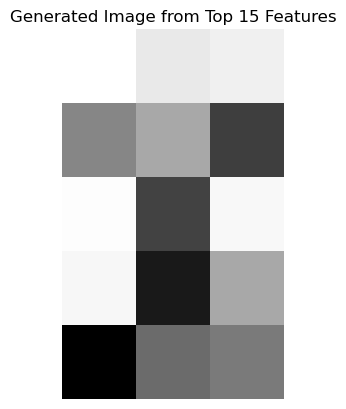

Epoch 1/10


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5849 - loss: 1.4478 - val_accuracy: 0.6000 - val_loss: 0.6261
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5147 - loss: 0.7451 - val_accuracy: 0.6000 - val_loss: 0.6199
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7801 - loss: 0.5197 - val_accuracy: 0.7500 - val_loss: 0.4187
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8100 - loss: 0.3834 - val_accuracy: 0.8500 - val_loss: 0.4196
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8885 - loss: 0.3029 - val_accuracy: 0.8000 - val_loss: 0.3797
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8830 - loss: 0.3232 - val_accuracy: 0.8500 - val_loss: 0.3834
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9173 - loss: 0.2691 - val_accuracy: 0.8000 - val_loss: 0.3899
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9154 - loss: 0.2445 - val_accuracy: 0.8500 - val_loss: 0.36

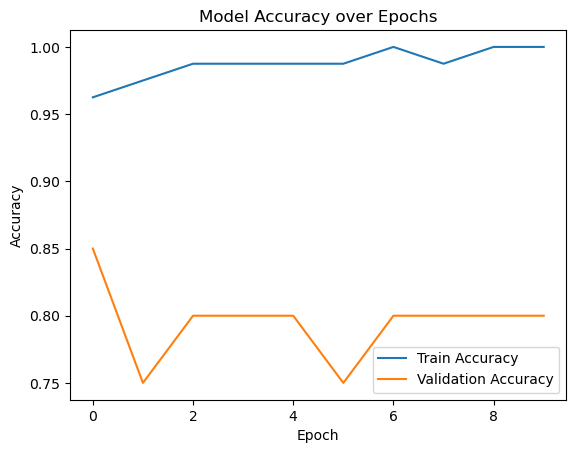

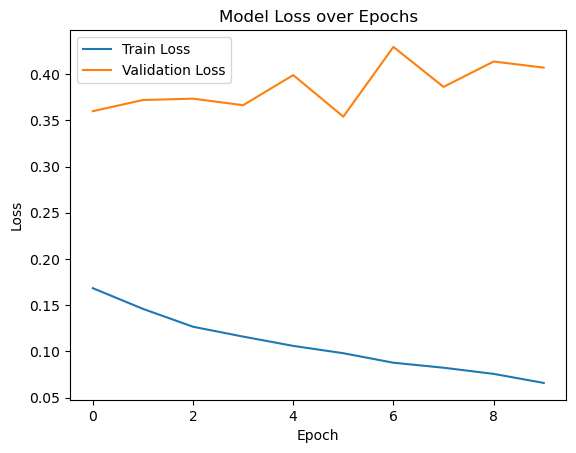

In [47]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Sample data generate kar rahe hain (aap apna real data yahan use kar sakte ho)
X, y = make_classification(n_samples=100, n_features=30, random_state=42)
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# 2. Feature Selection using Information Gain (Top 15 features le rahe hain)
selector = SelectKBest(score_func=mutual_info_classif, k=15)
top_15features_indices = selector.fit(X_train, y_train).get_support()
top_15features = X_train.columns[top_15features_indices]
top_15data_train = X_train[top_15features].copy()
top_15data_test = X_test[top_15features].copy()

print("Top 15 Features (based on Information Gain):", top_15features.tolist())

# 3. Function to convert feature vector to RGB image (3x5 size)
def features_to_rgb_image(feature_vector, width=3, height=5):
    normalized_features = ((feature_vector - feature_vector.min()) / (feature_vector.max() - feature_vector.min()) * 255).astype(np.uint8)
    image_array_1d = normalized_features.reshape((height, width))
    image_array_rgb = np.stack([image_array_1d]*3, axis=-1)
    img = Image.fromarray(image_array_rgb)
    return img

# Show sample image
img_train = features_to_rgb_image(top_15data_train.iloc[0].values)
plt.imshow(img_train)
plt.title("Generated Image from Top 15 Features")
plt.axis('off')
plt.show()

# 4. Load pre-trained VGG16 model (top layer removed)
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Function to extract VGG16 features
def extract_vgg16_features(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    processed_img = preprocess_input(img_array)
    features = base_model.predict(processed_img, verbose=0)
    return features.flatten()

# Function to create dataset from top 15 features using VGG16
def create_vgg16_feature_dataset(top_15df):
    vgg16_features_list = []
    for index, row in top_15df.iterrows():
        img = features_to_rgb_image(row.values)
        vgg16_features = extract_vgg16_features(img)
        vgg16_features_list.append(vgg16_features)
    return np.array(vgg16_features_list)

# ✅ Step that was missing earlier — creating VGG16 features
vgg16_train_features = create_vgg16_feature_dataset(top_15data_train)
vgg16_test_features = create_vgg16_feature_dataset(top_15data_test)

# Sanity check: labels and features ka size match hona chahiye
assert len(vgg16_train_features) == len(y_train), "Mismatch in train features and labels!"
assert len(vgg16_test_features) == len(y_test), "Mismatch in test features and labels!"

# 5. Classifier create karte hain (Simple Neural Network)
model = Sequential([
    Dense(128, activation='relu', input_shape=(512,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the model
model.fit(vgg16_train_features, y_train, epochs=10, batch_size=8, validation_data=(vgg16_test_features, y_test))


# Save history
history = model.fit(vgg16_train_features, y_train, epochs=10, batch_size=8, validation_data=(vgg16_test_features, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


